# Customer Churn - Exploratory Analysis
As a financial services firm, it is very important to know which of your services that clients find most useful. With this knowledge, you can prioritize discounts and know which customers to offer special deals to if they are likely to go to another company for similar services. To produce an example of this, I am using a dataset from Kaggle entitled "Telco Customer Churn."

Determining whether a customer will leave (churn) is a classification problem - we will take multiple points of information about each customer and predict whether or not they will continue to employ our services in the future.

This notebook is one of two in this repository that deals with the Telco Customer Churn dataset - this one will act as the home for the exploratory analysis. If you are interested in seeing the notebook with the data cleaning, feature engineer, and classification modelling, you can click HERE (add link soon).

The data source can be found [here](https://www.kaggle.com/blastchar/telco-customer-churn).

## Importing Packages and Data

In [68]:
# import packages
# data handling
import os
import pandas as pd
import numpy as np
# graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
# inline images are set to high quality
%config InlineBackend.figure_format = 'svg'

In [69]:
# import data
os.chdir('/Users/user1/Downloads')
filename = 'Telco_Customer_Churn.csv'
df = pd.read_csv(filename)

## Introductory Statistics

In [70]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Are we missing any entries? Are all of our datatypes correctly imported?

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Currently, there are no missing entries, but TotalCharges should be float64 - let's convert it!

In [72]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

Now we have Nulls in TotalCharges from the empty strings that represented 0. Lets fill the NaN's with 0.

In [73]:
df['TotalCharges'].fillna(0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

Looks like everything is fixed for now. Later on, we'll have to encode most of these measures so that they can be used by our model.

How's our balance of Churn (Yes vs. No) in the dataset?

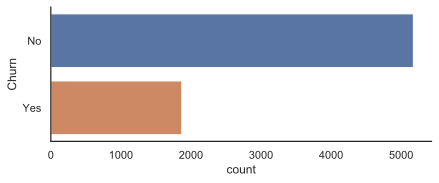

In [74]:
sns.catplot(y = 'Churn', kind = 'count', data = df, height = 2.5, aspect = 2.5)
plt.show()

We observe that our sampling for Churn is imbalanced at a rate of about 1:2.5 No's to Yes's - we might want to rebalance in the future to prevent class imbalance.

What conclusions can we draw about our numeric features?

## Churn for Numeric Features

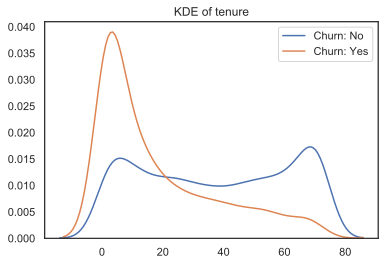

In [75]:
def plot_kde(col):
    sns.kdeplot(df[df['Churn'] == 'No'][col], label = 'Churn: No')
    sns.kdeplot(df[df['Churn'] == 'Yes'][col], label = 'Churn: Yes')
    title = 'KDE of {}'.format(col)
    plt.title(title)
    plt.show()
plot_kde('tenure')

Customers are less likely to churn the longer they've been a customer.

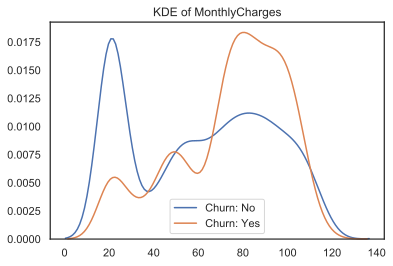

In [76]:
plot_kde('MonthlyCharges')

The more a customer is charged monthly, the more likely they are to churn. This peaks at around $80-100, many customers that Churn fall in this range.

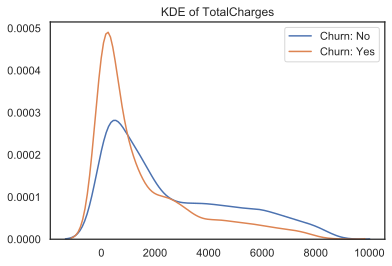

In [77]:
plot_kde('TotalCharges')

Both KDEs of TotalCharges are unimodal at a low value of TotalCharges, which suggests most of the customers have less than 2000 in total charges.

We can assume that Tenure and Monthly Charges are better predictors of Churn than TotalCharges.

## Churn across Categorical Measures

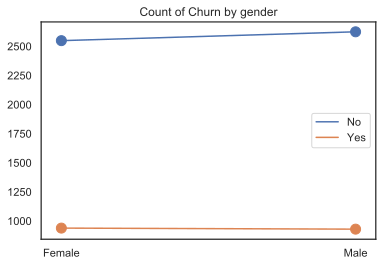

In [78]:
def map_churn(col, figsize = (6,4)):
    data = df.groupby([col, "Churn"]).size().reset_index().rename(columns={0: "total"})
    fig, ax = plt.subplots(figsize = figsize)
    for t in data.Churn.unique():
        dt = data[data.Churn.eq(t)].copy()
        x = dt[col]
        y = dt["total"]
        ax.scatter(x=x, y=y, s=100)
        ax.plot(x, y)
    ax.legend(['No', 'Yes'], loc = 'best')
    plt.title('Count of Churn by {}'.format(col))
    plt.show()
map_churn('gender')

Churn rate is consistent across gender - assumption: not a good measure for prediction.

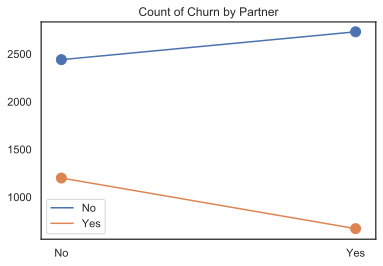

In [79]:
map_churn('Partner')

Difference in Churn rate - No partner is an indicator of someone being more likely to churn. Partner may be good measure for predicting Churn.

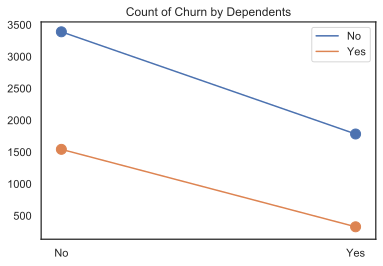

In [80]:
map_churn('Dependents')

Roughly Parallel - this indicates that the presence of Dependents has little to no effect on customer Churn.

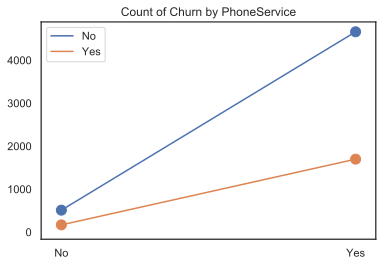

In [81]:
map_churn('PhoneService')

Looks like Churn rates differ significantly between Yes and No for PhoneService - however, this may be attributed to the small sample of Nos. Could be good predictor for Churn.

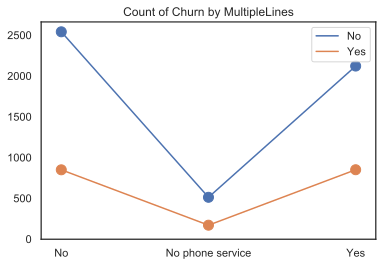

In [82]:
map_churn('MultipleLines')

Churn for No Phone Service differs for No Phone Service - decrease in "Yes" to Churn is less than decrease in "No" indicating that "No Phone Service" for MultipleLines may hae a higher rate of Churn.

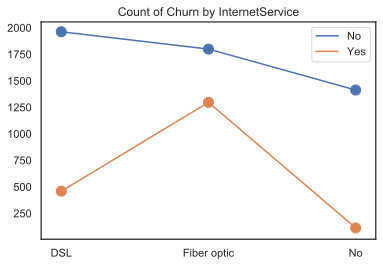

In [83]:
map_churn('InternetService')

Rates of Churn for Fiber Optic are significantly higher than DSL or No Internet Service. Internet Service may be a good predictor for Churn.

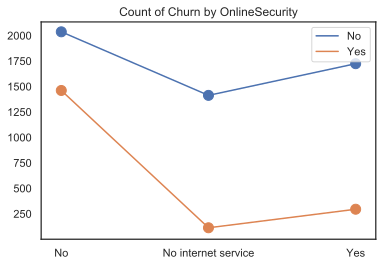

In [84]:
map_churn('OnlineSecurity')

Customers with No Online Security have a much higher rate of Churn. OnlineSecurity may be a good predictor.

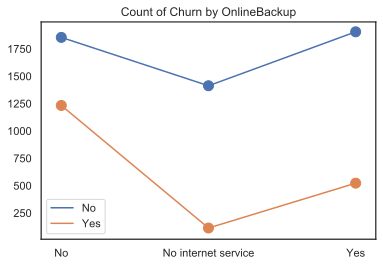

In [85]:
map_churn('OnlineBackup')

Similar trend to OnlineSecurity - these measures are roughly identical, so they may be correlated to one another.

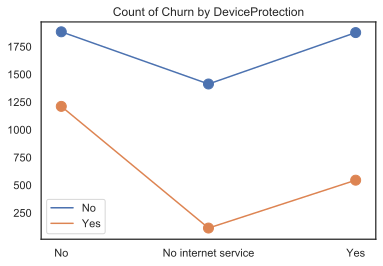

In [86]:
map_churn('DeviceProtection')

Similar to OnlineBackup.

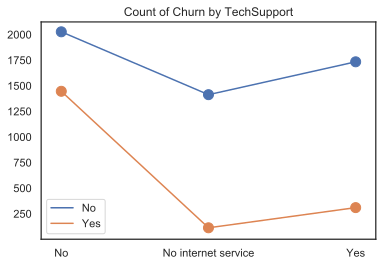

In [87]:
map_churn('TechSupport')

Similar to OnlineSecurity, OnlineBackup, and DeviceProtection.

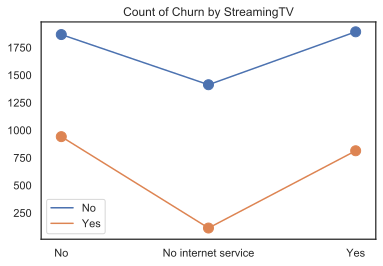

In [88]:
map_churn('StreamingTV')

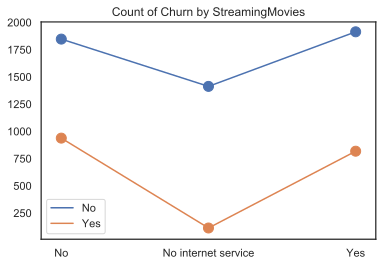

In [89]:
map_churn('StreamingMovies')

Lines for for StreamingTV and StreamingMovies are similar and roughly paralle, indicating that there is little relationship between StreamingMovies and Churn, as well as that StreamingTV and StreamingMovies may be correlated.

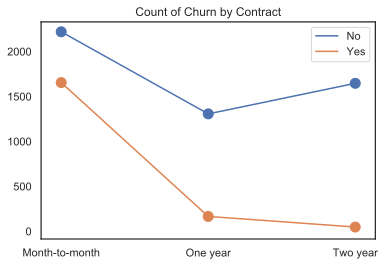

In [90]:
map_churn('Contract')

Churn rates are significantly higher for month-to-month rather than One Year and Two Year. Contract type may be good indicator of Churn.

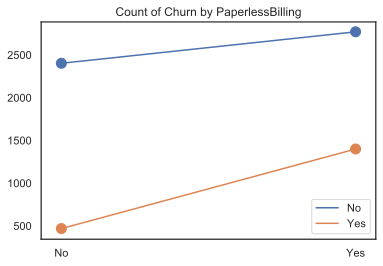

In [91]:
map_churn('PaperlessBilling')

PaperlessBilling is approximately parallel - experiences slightly higher Churn rates for Paperless Billing than not. May be decent predictor of Churn.

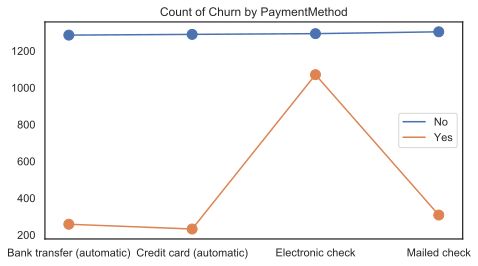

In [92]:
map_churn('PaymentMethod', figsize = (7.5,4))

Many of our customers who churned were using Electronic Check as a PaymentMethod, so this may be a good predictor. An additional insight is that "automatic" vs. "non-automatic" Payment Methods might display disparity for Churn because an automatic payment is easier to ignore every month.

## Encode Categorical Measures
Since we still have many categorical measures, we can encode them using sklearn's OrdinalEncoder to take a quick look at the correlation heatmap.

In [93]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat = df[df.columns[df.dtypes == 'object']].copy().drop('customerID', axis = 1)
df_cat_trans = ordinal_encoder.fit_transform(df_cat)
df_cat_final = pd.DataFrame(df_cat_trans, columns = df_cat.columns)
df_cat_final.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0


In [94]:
df_numerical = df[df.columns[df.dtypes != 'object']].copy()
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [95]:
df_transformed = pd.concat([df_cat_final, df_numerical], axis = 1)
df_transformed.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0,1,29.85,29.85
1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,34,56.95,1889.50
2,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2,53.85,108.15
3,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0,45,42.30,1840.75
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0,2,70.70,151.65


## Heatmap
Two points to remember with heatmaps is that they only capture direct, linear relationships, since we are using pearson standard correlation coefficient. We are also missing out on some relationships due to the Ordinal Encoding instilling the numeric idea that a higher number is better than a lower. For our model, we will likely use a combination of the two - ex. Partner value of 1 means more Partners than 0, but PaymentMethod of 3 is deceiving since there's no "order of magnitude."

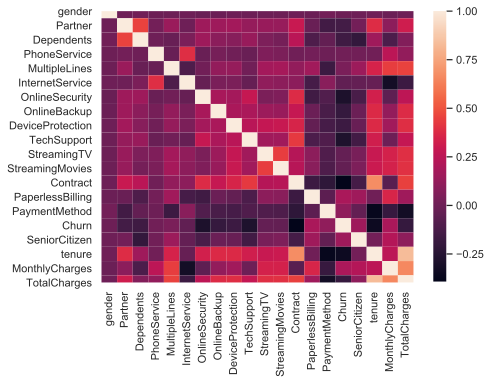

In [96]:
g = df_transformed.corr()
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(g)
plt.show()

# Conclusions and Takeaways
After our exploratory analysis, it's clear that some features are more important to determining Churn than others. Two notable examples include Payment Method and Internet Service, while other measures like StreamingTV and StreamingMovies have much less of a relationship with Churn rates.

Our next step is to take our assumptions and apply them in the context of feature engineering and model building. If you're interested in the next steps, you can find the next portion of this notebook [here].